In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from impact import Impact

from distgen import Generator

import numpy as np

import os 

ROOT = os.environ['FACET2_LATTICE']

In [3]:
# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

# cu_inj Impact-T

In [4]:
ifile = os.path.join(ROOT, 'impact/models/f2e_inj/v0/ImpactT.yaml')
gfile = os.path.join(ROOT, 'distgen/models/f2e_inj/v0/distgen.yaml')
assert os.path.exists(ifile)
assert os.path.exists(gfile)


In [14]:
I = Impact.from_yaml(ifile)

# Check Energies

In [6]:
from impact.autophase import autophase_and_scale

from pmd_beamphysics import single_particle

P0 = single_particle(pz=1e-15, z=1e-15)

# Energy out of the gun
I.track(P0, s = 0.5)['mean_energy']

6012151.122003934

In [7]:
I.track(P0, s = I['L0AF_exit']['s'])['mean_energy']

62120588.63219254

In [8]:
I.track(P0, s = 12.5)['mean_energy']

132117488.22402179

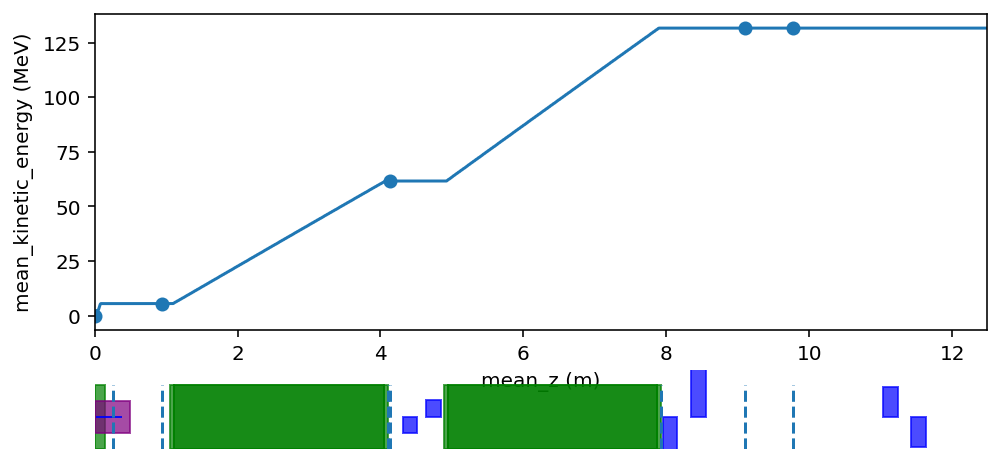

In [9]:
I.plot('mean_kinetic_energy')

In [10]:
I.particles

{'initial_particles': <ParticleGroup with 1 particles at 0x15e0569a0>,
 'final_particles': <ParticleGroup with 1 particles at 0x15e056970>,
 'PR10241': <ParticleGroup with 1 particles at 0x15e24ff40>,
 'L0AFEND': <ParticleGroup with 1 particles at 0x15e05e7c0>,
 'PR10465': <ParticleGroup with 1 particles at 0x15e05e5e0>,
 'PR10471': <ParticleGroup with 1 particles at 0x15e05ef70>}

# Gun Phasing

In [12]:
autophase_and_scale(I, phase_ele_name='GUNF_phase',
                    phase_attribute='dtheta0_deg',
                    scale_ele_name='GUNF_scale',
                    scale_attribute='voltage',
                    target=6e6, scale_range=(4e6, 6e6),
                    metric='mean_energy',
                    initial_particles=P0, verbose=True)

Copied initial Impact object. 
Phasing GUNF_phase by changing dtheta0_deg
Scaling GUNF_scale by changing voltage
Bounds: 0.0, 0.15 m
Disabling SOL10111
Disabling L0AF_entrance
Disabling L0AF_body_1
Disabling L0AF_body_2
Disabling L0AF_exit
Disabling L0BF_entrance
Disabling L0BF_body_1
Disabling L0BF_body_2
Disabling L0BF_exit
Default brent2 algorithm
Phase: 180, Scale: 4000000.0, 0.0 M
Phase: 180, Scale: 4000000.0, 0.0 M
Phase: 42.49224000000004, Scale: 4000000.0, 3.3187678203780315 MeV
Phase: 264.9844890561601, Scale: 4000000.0, 0.0 M
Phase: 42.49224000000004, Scale: 4000000.0, 3.3187678203780315 MeV
Phase: 42.49223440298533, Scale: 4000000.0, 3.318768120421592 MeV
Phase: 264.9844709438398, Scale: 4000000.0, 0.0 M
Phase: 222.49225347495212, Scale: 4000000.0, 0.0 M
Phase: 127.47670402554945, Scale: 4000000.0, 0.0 M
Phase: 333.7383616878283, Scale: 4000000.0, 4.4316522234874265 MeV
Phase: 291.24613071818885, Scale: 4000000.0, 0.0 M
Phase: 3.4333459097979357e-06, Scale: 4000000.0, 4.4665

(0.07752968240851033, 5489005.283048258)

# L0AF, L0BF

In [15]:
# L0AF'
autophase_and_scale(I, phase_ele_name='L0AF_phase', phase_attribute='dtheta0_deg', scale_ele_name='L0AF_scale', scale_attribute='voltage',
                    target=64e6, scale_range=(10e6, 100e6), initial_particles=P0, verbose=True, debug=False)

Copied initial Impact object. 
Phasing L0AF_phase by changing dtheta0_deg
Scaling L0AF_scale by changing voltage
Bounds: 1.058398, 4.101254 m
Tracking initial particles to s = 1.058398
Initial particle:  1.05886182046 6012151.122003934
Disabling GUNF
Disabling SOL10111
Disabling L0BF_entrance
Disabling L0BF_body_1
Disabling L0BF_body_2
Disabling L0BF_exit
Default brent2 algorithm
Phase: 180, Scale: 10000000.0, 5.398206314618695 MeV
Phase: 180, Scale: 10000000.0, 5.398206314618695 MeV
Phase: 42.49224000000004, Scale: 10000000.0, 10.246566353018613 MeV
Phase: 264.9844890561601, Scale: 10000000.0, 9.43746963854429 MeV
Phase: 42.49224000000004, Scale: 10000000.0, 10.246566353018613 MeV
Phase: 42.49223440298533, Scale: 10000000.0, 10.246567348646767 MeV
Phase: 264.9844709438398, Scale: 10000000.0, 9.437467243456574 MeV
Phase: 222.49245869810488, Scale: 10000000.0, 5.0762972551331655 MeV
Phase: 127.47670402554945, Scale: 10000000.0, 4.843529160855381 MeV
Phase: 333.738440076095, Scale: 10000

(346.79301845052, 57987816.559966326)

In [ ]:
# L0BF
autophase_and_scale(I, phase_ele_name='L0BF_phase', phase_attribute='dtheta0_deg', scale_ele_name='L0BF_scale', scale_attribute='voltage',
                    target=135e6, scale_range=(10e6, 100e6), initial_particles=P0, verbose=True, debug=False)

In [ ]:
dphi = 80.89517285557837

In [ ]:
plist = [44.27 ,
74.27 ,
134.27,
44.27 ]
for p in plist:
    print(p+dphi)

# Integrated Solenoid field

In [ ]:
from impact import  fieldmaps
import numpy as np

# Fieldmaps are stored here
I.input['fieldmaps'].keys()

In [ ]:
# Look at a solrf element. 
I.ele['SOL10111']

In [ ]:
# That data is here. 
rdfata = I.input['fieldmaps']['rfdata102']

#This will process the fieldmap to extract Ez and Bz
fmap = fieldmaps.process_fieldmap_solrf(rdfata['data'])
fmap

In [ ]:
# Reconstruction function
fieldmaps.fieldmap_reconsruction(fmap['Bz'], 0)

In [ ]:
zmax = 0.49308

zlist = np.linspace(0, zmax, 1000)
fieldlist = np.array([fieldmaps.fieldmap_reconsruction(fmap['Bz'], z) for z in zlist])

# z at max field
zlist[np.argmax(np.array(fieldlist))]

In [ ]:
plt.plot(zlist, fieldlist)

In [ ]:
# Effective length (integral of field^2)
Leff = np.trapz(fieldlist**2, zlist)/fieldlist.max()**2
Leff

In [ ]:
0.1/Leff

In [ ]:
0.4*0.61339616

In [ ]:
0.4*0.1/Leff

In [ ]:
0.4 /10

In [ ]:
# PV (kG*m)/Leff*m * 0.1 T/kG = peak field in T

In [ ]:
# Integrated field (approximate)
dz = zmax/1000
BL = np.sum(fieldlist)*dz  # T*m

# 
BL * 10 # T*m -> kG*m

In [ ]:
# Factor to convert BL in kG*m to Bmax in T
1/(BL * 10 )

# Corrector Quads

In [ ]:
ele = I.ele['CQ10121']
ele

In [ ]:
I['CQ10121:b1_gradient']

In [ ]:
# Factor to convert kG to T/m
0.1/ele['L_effective'] 